# Imbalanced Classification with the Adult Income Dataset

<h3> Step 1: </h3> Introduction -> Give a detailed data description and objective.

The dataset provides 14 input variables that are a mixture of categorical, ordinal, and numerical data types. The complete list of variables is as follows:<br>

* Age.
* Workclass.
* Final Weight.
* Education.
* Education Number of Years.
* Marital-status.
* Occupation.
* Relationship.
* Race.
* Sex.
* Capital-gain.
* Capital-loss.
* Hours-per-week.
* Native-country. <br>

<br>
The dataset contains missing values that are marked with a question mark character (?). <br>

There are a total of 48,842 rows of data, and 3,620 with missing values, leaving 45,222 complete rows. <br>

There are two class values ‘>50K‘ and ‘<=50K‘, meaning it is a binary classification task. The classes are imbalanced, with a skew toward the ‘<=50K‘ class label. <br><br>

‘>50K’: majority class, approximately 25%. <br>
‘<=50K’: minority class, approximately 75%. <br>
Given that the class imbalance is not severe and that both class labels are equally important, it is common to use classification accuracy or classification error to report model performance on this dataset. <br><br>

Using predefined train and test sets, reported good classification error is approximately 14 percent or a classification accuracy of about 86 percent. This might provide a target to aim for when working on this dataset. <br><br>

Next, let’s take a closer look at the data.

<h3>Step 2:</h3> Import the data and perform basic pandas operations.

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Dataset and converting all the missing values which are denoted as '?' to NaN.
df = pd.read_csv(r"C:\Users\TheWhiteWolf\Desktop\Afif\Innomatics Internship\Data Analysis Tasks\Task2_EDA\adult.csv", na_values='?')

In [3]:
# Setting the display of rows and columns to max so can all the rows and columns be displayed
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [4]:
# Head of Dataframe
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
# Shape od Dataframe
df.shape

(48842, 15)

In [6]:
# Description od Dataframe
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# Info of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<h3> Step 3: </h3>
<h4>Univariate Analysis </h4>-> PDF, Histograms, Boxplots, Countplots, etc.. <br>
-	Find the outliers in each numerical column <br>
-	Understand the probability and frequency distribution of each numerical column <br>
-	Understand the frequency distribution of each categorical Variable/Column <br>
-	Mention observations after each plot.

### Univariate Analysis of Continous Variables:   PDF, Histograms, Boxplots.

#### 1) Univariate Analysis on age Column:

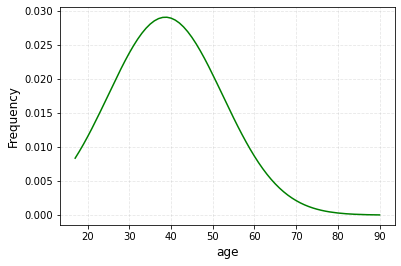

In [8]:
# PDF
pdf = stats.norm.pdf(df['age'].sort_values(), np.mean(df['age']), np.std(df['age']))
plt.plot(df["age"].sort_values(), pdf, color = 'g')
plt.xlabel("age", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

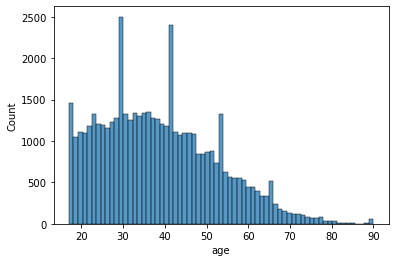

In [9]:
# HISTOGRAM
sns.histplot(df['age'])

<AxesSubplot:>

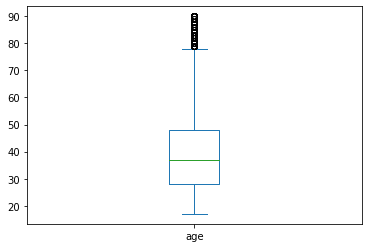

In [10]:
# BOXPLOT
df['age'].plot.box()

**Observations:** The age is positively skewened and there are Outliers in the column.

#### 2) Univariate Analysis on fnlwgt Column:

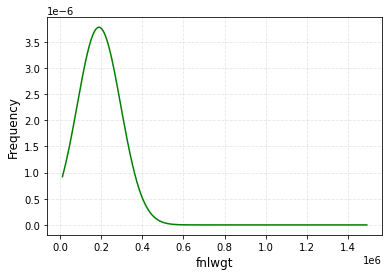

In [11]:
# PDF
pdf = stats.norm.pdf(df['fnlwgt'].sort_values(), np.mean(df['fnlwgt']), np.std(df['fnlwgt']))
plt.plot(df["fnlwgt"].sort_values(), pdf, color = 'g')
plt.xlabel("fnlwgt", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

<AxesSubplot:ylabel='Frequency'>

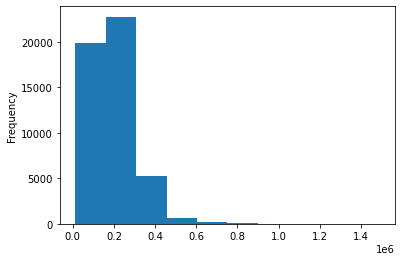

In [12]:
# HISTOGRAM
df['fnlwgt'].plot.hist()

<AxesSubplot:>

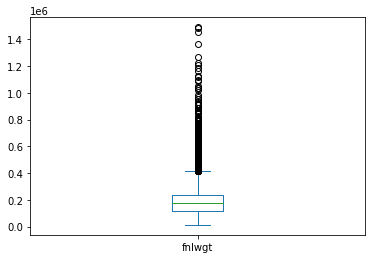

In [13]:
# BOXPLOT
df['fnlwgt'].plot.box()

**Observations:** The fnlwgt is positively skewened and there are Outliers in the column.

#### 3) Univariate Analysis on educational-num Column:

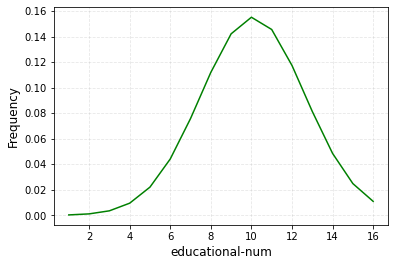

In [14]:
# PDF
pdf = stats.norm.pdf(df['educational-num'].sort_values(), np.mean(df['educational-num']), np.std(df['educational-num']))
plt.plot(df["educational-num"].sort_values(), pdf, color = 'g')
plt.xlabel("educational-num", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

<AxesSubplot:ylabel='Frequency'>

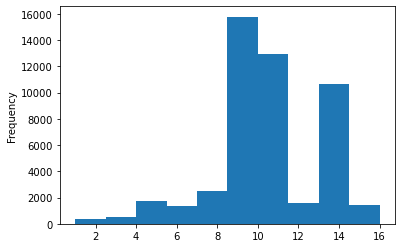

In [15]:
# HISTOGRAM
df['educational-num'].plot.hist()

<AxesSubplot:>

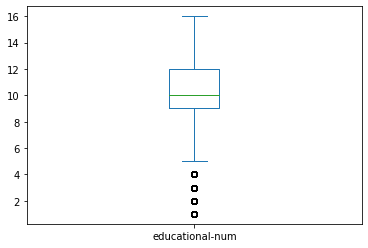

In [16]:
# BOXPLOT
df['educational-num'].plot.box()

<AxesSubplot:xlabel='educational-num', ylabel='count'>

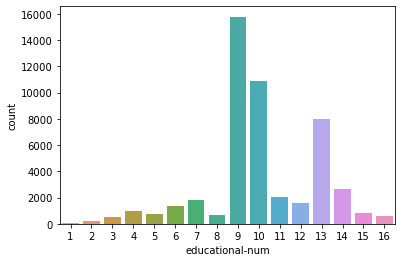

In [17]:
# COUNTPLOT
sns.countplot(x='educational-num', data = df)

**Observations:** The educational-num is negatively skewened and there are Outliers in the column.

#### 4) Univariate Analysis on capital-gain Column:

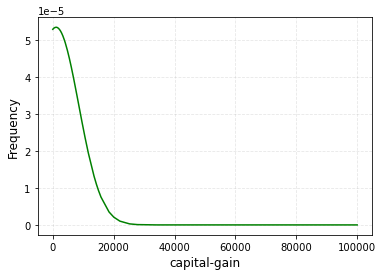

In [18]:
# PDF
pdf = stats.norm.pdf(df['capital-gain'].sort_values(), np.mean(df['capital-gain']), np.std(df['capital-gain']))
plt.plot(df["capital-gain"].sort_values(), pdf, color = 'g')
plt.xlabel("capital-gain", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

<AxesSubplot:ylabel='Frequency'>

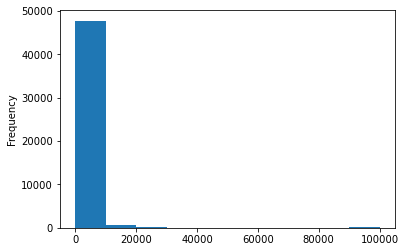

In [19]:
# HISTOGRAM
df['capital-gain'].plot.hist()

<AxesSubplot:>

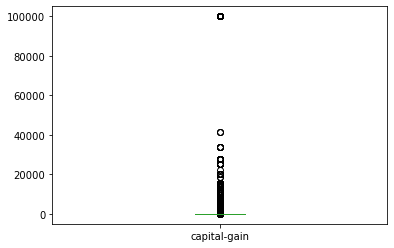

In [20]:
# BOXPLOT
df['capital-gain'].plot.box()

**Observations:** The capital-gain is positively skewened and there are Outliers in the column.

#### 5) Univariate Analysis on capital-loss Column:

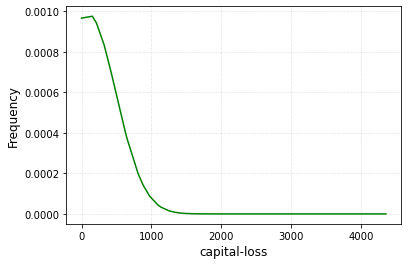

In [21]:
# PDF
pdf = stats.norm.pdf(df['capital-loss'].sort_values(), np.mean(df['capital-loss']), np.std(df['capital-loss']))
plt.plot(df["capital-loss"].sort_values(), pdf, color = 'g')
plt.xlabel("capital-loss", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

<AxesSubplot:ylabel='Frequency'>

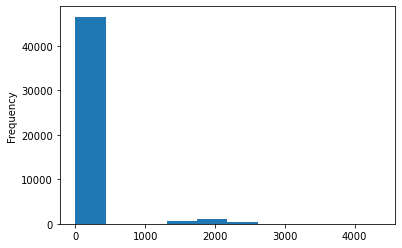

In [22]:
# HISTOGRAM
df['capital-loss'].plot.hist()

<AxesSubplot:>

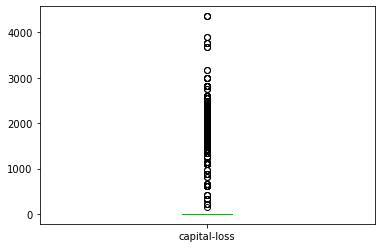

In [23]:
# BOXPLOT
df['capital-loss'].plot.box()

**Observations:** The capital-loss is positively skewened and there are Outliers in the column.

#### 6) Univariate Analysis on hours-per-week Column:

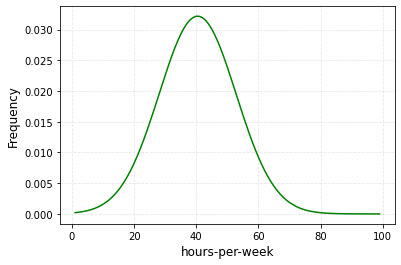

In [24]:
# PDF
pdf = stats.norm.pdf(df['hours-per-week'].sort_values(), np.mean(df['hours-per-week']), np.std(df['hours-per-week']))
plt.plot(df["hours-per-week"].sort_values(), pdf, color = 'g')
plt.xlabel("hours-per-week", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

<AxesSubplot:ylabel='Frequency'>

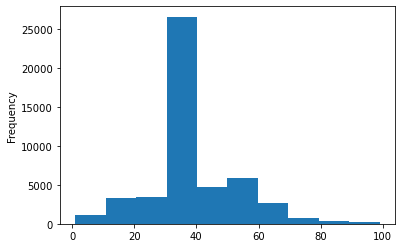

In [25]:
# HISTOGRAM
df['hours-per-week'].plot.hist()

<AxesSubplot:>

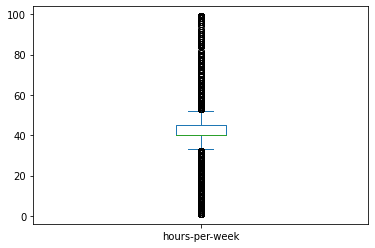

In [26]:
# BOXPLOT
df['hours-per-week'].plot.box()

**Observations:** The hours-per-week is positively skewened and there are Outliers in the column.

### Univariate Analysis of Categorical Variables:   Frequency Table, Barplots, Countplots.

#### 1) Univariate Analysis on workclass Column:

In [27]:
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [28]:
# Frequecy Table
df['workclass'].value_counts().head()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Name: workclass, dtype: int64

<AxesSubplot:>

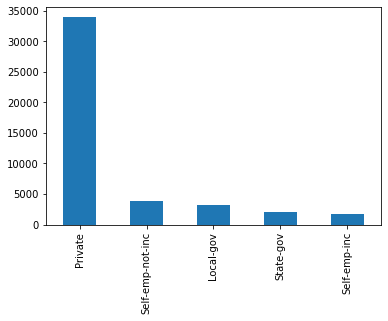

In [29]:
# BARPLOT
df['workclass'].value_counts().head().plot.bar()

**Observations:**  The highest number of adults work as Private.

#### 2) Univariate Analysis on education Column:

In [30]:
# Frequecy Table
df['education'].value_counts().head()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
Name: education, dtype: int64

<AxesSubplot:>

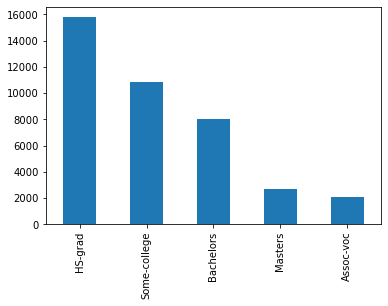

In [31]:
# BARPLOT
df['education'].value_counts().head().plot.bar()

**Observations:**  The highest number of adults are educated as HS-grade.

#### 3) Univariate Analysis on marital-status Column:

In [32]:
# Frequecy Table
df['marital-status'].value_counts().head()

Married-civ-spouse    22379
Never-married         16117
Divorced               6633
Separated              1530
Widowed                1518
Name: marital-status, dtype: int64

<AxesSubplot:>

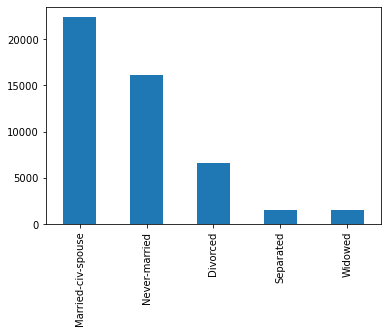

In [33]:
# BARPLOT
df['marital-status'].value_counts().head().plot.bar()

**Observations:**  The highest number of adults have marital status as Married-civ-spouse.

#### 4) Univariate Analysis on occupation Column:

In [34]:
# Frequecy Table
df['occupation'].value_counts().head()

Prof-specialty     6172
Craft-repair       6112
Exec-managerial    6086
Adm-clerical       5611
Sales              5504
Name: occupation, dtype: int64

<AxesSubplot:>

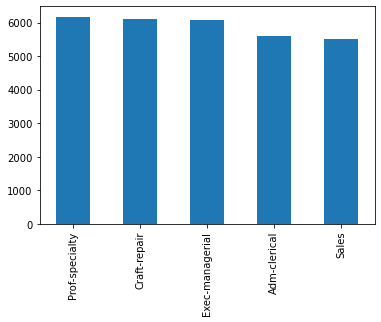

In [35]:
# BARPLOT
df['occupation'].value_counts().head().plot.bar()

**Observations:**  The highest number of adults have an occupation as Prof-speciality.

#### 5) Univariate Analysis on relationship Column:

In [36]:
# Frequecy Table
df['relationship'].value_counts().head()

Husband          19716
Not-in-family    12583
Own-child         7581
Unmarried         5125
Wife              2331
Name: relationship, dtype: int64

<AxesSubplot:>

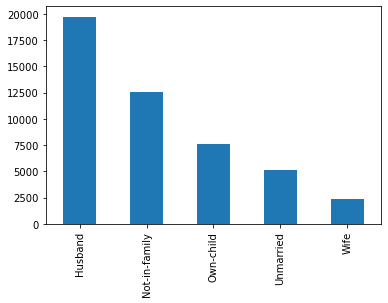

In [37]:
# BARPLOT
df['relationship'].value_counts().head().plot.bar()

**Observations:**  The highest number of adults have relative as Husband.

#### 6) Univariate Analysis on race Column:

In [38]:
# Frequecy Table
df['race'].value_counts().head()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

<AxesSubplot:>

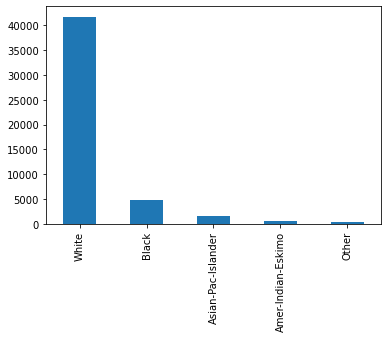

In [39]:
# BARPLOT
df['race'].value_counts().head().plot.bar()

**Observations:**  The highest number of adults are from White race.

#### 7) Univariate Analysis on gender Column:

In [40]:
# Frequecy Table
df['gender'].value_counts().head()

Male      32650
Female    16192
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

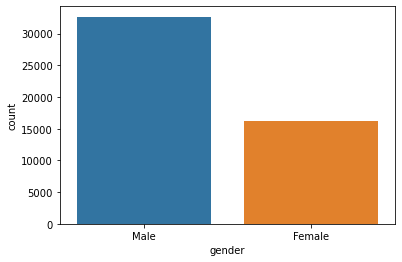

In [41]:
# COUNTPLOT
sns.countplot(x='gender', data = df)

**Observations:**  The highest number of adults working are Male.

#### 8) Univariate Analysis on native-country Column:

In [42]:
# Frequecy Table
df['native-country'].value_counts().head()

United-States    43832
Mexico             951
Philippines        295
Germany            206
Puerto-Rico        184
Name: native-country, dtype: int64

<AxesSubplot:>

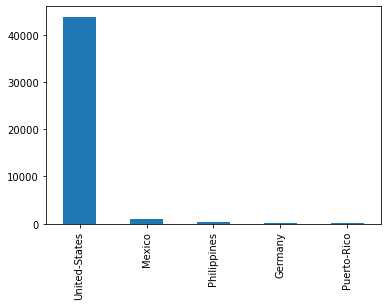

In [43]:
# BARPLOT
df['native-country'].value_counts().head().plot.bar()

**Observations:**  The highest number of adults have native country as United-States.

#### 9) Univariate Analysis on income Column:

In [44]:
# Frequecy Table
df['income'].value_counts().head()

<=50K    37155
>50K     11687
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

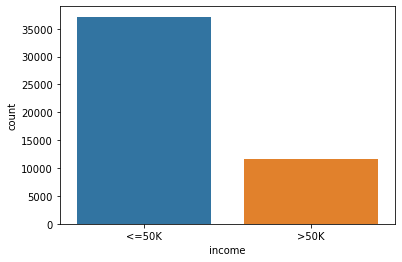

In [45]:
# COUNTPLOT
sns.countplot(x='income', data = df)

**Observations:**  The highest number of adults are from minority class having income less than 50K.

<h3> Step 4: </h3> <h4> Bivariate Analysis:</h4>
-	Discover the relationships between numerical columns using Scatter plots, hexbin plots, pair plots, etc.. <br>
-	Identify the patterns between categorical and numerical columns using swarmplot, boxplot, barplot, etc.. <br>
-	Mention observations after each plot..

In [46]:
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


### Numerical - Numerical Bivariate Analysis:
#### 1) Bivariate Analysis on Age and Final Weight Column:

<AxesSubplot:xlabel='age', ylabel='fnlwgt'>

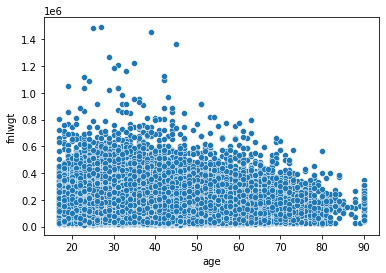

In [47]:
# Scatter Plot
sns.scatterplot(x = df['age'], y = df['fnlwgt'], data = df)

-0.07662807893178852

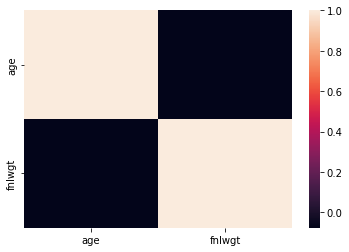

In [48]:
# Correlation
sns.heatmap(df[['age', 'fnlwgt']].corr())
df['age'].corr(df['fnlwgt'])

**Observations:**  There is no relation between age and fnlwgt column.

#### 2) Bivariate Analysis on Age and educational-num Column:

<AxesSubplot:xlabel='age', ylabel='educational-num'>

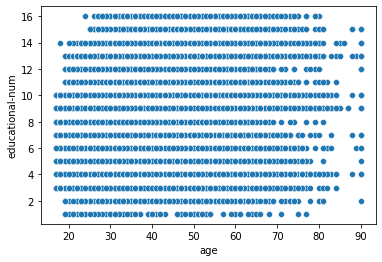

In [49]:
# Scatter Plot
sns.scatterplot(x = df['age'], y = df['educational-num'], data = df)

0.030940375874513978

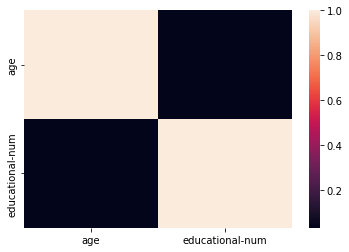

In [50]:
# Correlation
sns.heatmap(df[['age', 'educational-num']].corr())
df['age'].corr(df['educational-num'])

**Observations:**  There is no relation between age and educational-num column.

#### 3) Bivariate Analysis on Age and capital-gain Column:

<AxesSubplot:xlabel='age', ylabel='capital-gain'>

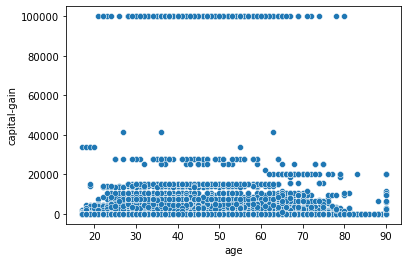

In [51]:
# Scatter Plot
sns.scatterplot(x = df['age'], y = df['capital-gain'], data = df)

0.077229022364381

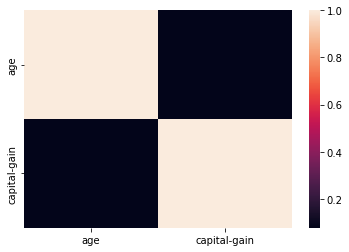

In [52]:
# Correlation
sns.heatmap(df[['age', 'capital-gain']].corr())
df['age'].corr(df['capital-gain'])

**Observations:**  There is no relation between age and capital-gain column.

#### 4) Bivariate Analysis on Age and capital-loss Column:

<AxesSubplot:xlabel='age', ylabel='capital-loss'>

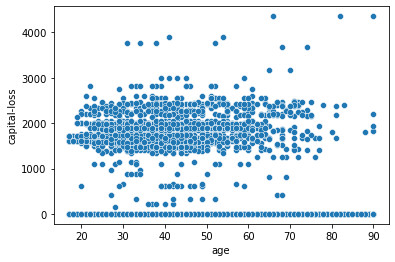

In [53]:
# Scatter Plot
sns.scatterplot(x = df['age'], y = df['capital-loss'], data = df)

0.05694382610561187

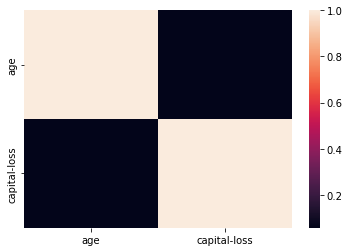

In [54]:
# Correlation
sns.heatmap(df[['age', 'capital-loss']].corr())
df['age'].corr(df['capital-loss'])

**Observations:**  There is no relation between age and capital-loss column.

#### 5) Bivariate Analysis on Age and hours-per-week Column:

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

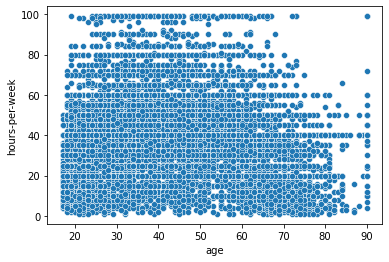

In [55]:
# Scatter Plot
sns.scatterplot(x = df['age'], y = df['hours-per-week'], data = df)

0.07155833852698279

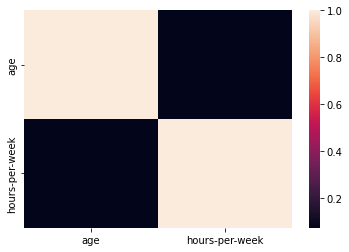

In [56]:
# Correlation
sns.heatmap(df[['age', 'hours-per-week']].corr())
df['age'].corr(df['hours-per-week'])

**Observations:**  There is no relation between age and hours-per-week column.

#### 6) Bivariate Analysis on fnlwgt and educational-num Column:

<AxesSubplot:xlabel='fnlwgt', ylabel='educational-num'>

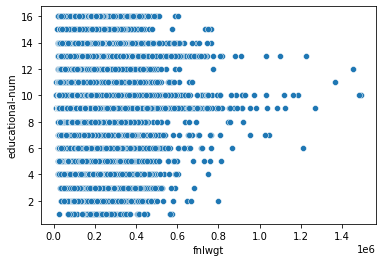

In [57]:
# Scatter Plot
sns.scatterplot(x = df['fnlwgt'], y = df['educational-num'], data = df)

-0.03876068354971025

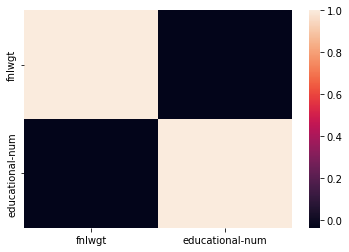

In [58]:
# Correlation
sns.heatmap(df[['fnlwgt', 'educational-num']].corr())
df['fnlwgt'].corr(df['educational-num'])

**Observations:**  There is no relation between fnlwgt and educational-num column.

#### 7) Bivariate Analysis on fnlwgt and capital-gain Column:

<AxesSubplot:xlabel='fnlwgt', ylabel='capital-gain'>

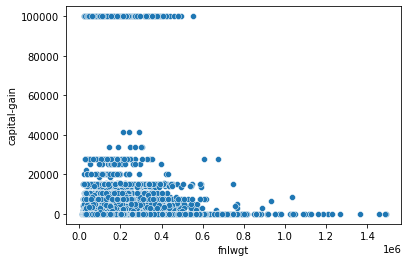

In [59]:
# Scatter Plot
sns.scatterplot(x = df['fnlwgt'], y = df['capital-gain'], data = df)

-0.003706388611082724

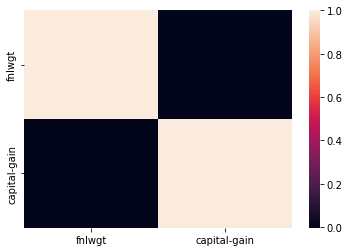

In [60]:
# Correlation
sns.heatmap(df[['fnlwgt', 'capital-gain']].corr())
df['fnlwgt'].corr(df['capital-gain'])

**Observations:**  There is no relation between fnlwgt and capital-gain column.

#### 8) Bivariate Analysis on fnlwgt and capital-loss Column:

<AxesSubplot:xlabel='fnlwgt', ylabel='capital-loss'>

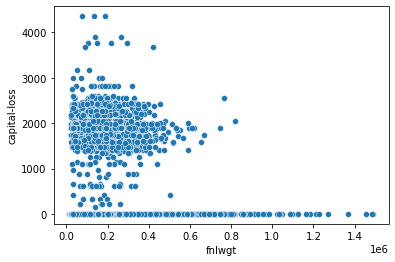

In [61]:
# Scatter Plot
sns.scatterplot(x = df['fnlwgt'], y = df['capital-loss'], data = df)

-0.00436614967949547

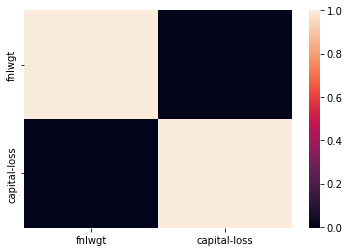

In [62]:
# Correlation
sns.heatmap(df[['fnlwgt', 'capital-loss']].corr())
df['fnlwgt'].corr(df['capital-loss'])

**Observations:**  There is no relation between fnlwgt and capital-loss column.

#### 9) Bivariate Analysis on fnlwgt and hours-per-week Column:

<AxesSubplot:xlabel='fnlwgt', ylabel='hours-per-week'>

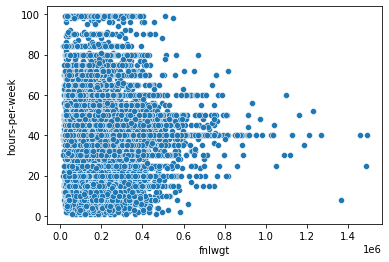

In [63]:
# Scatter Plot
sns.scatterplot(x = df['fnlwgt'], y = df['hours-per-week'], data = df)

-0.013518714690561444

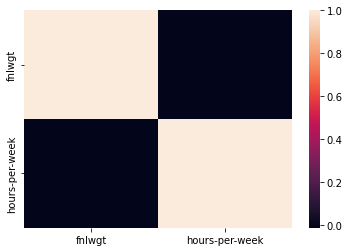

In [64]:
# Correlation
sns.heatmap(df[['fnlwgt', 'hours-per-week']].corr())
df['fnlwgt'].corr(df['hours-per-week'])

**Observations:**  There is no relation between fnlwgt and hours-per-week column.

#### 10) Bivariate Analysis on educational-num and capital-gain Column:

<AxesSubplot:xlabel='educational-num', ylabel='capital-gain'>

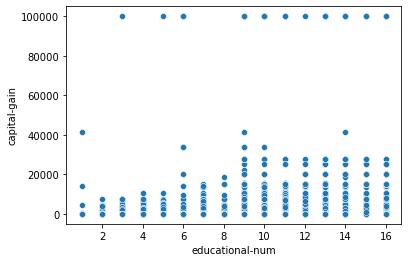

In [65]:
# Scatter Plot
sns.scatterplot(x = df['educational-num'], y = df['capital-gain'], data = df)

0.12514645910572125

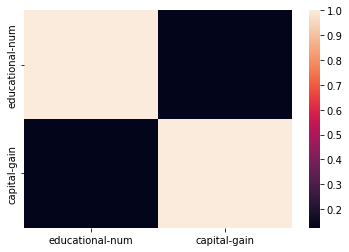

In [66]:
# Correlation
sns.heatmap(df[['educational-num', 'capital-gain']].corr())
df['educational-num'].corr(df['capital-gain'])

**Observations:**  There is no relation between educational-num and capital-gain column.

#### 11) Bivariate Analysis on educational-num and capital-loss Column:

<AxesSubplot:xlabel='educational-num', ylabel='capital-loss'>

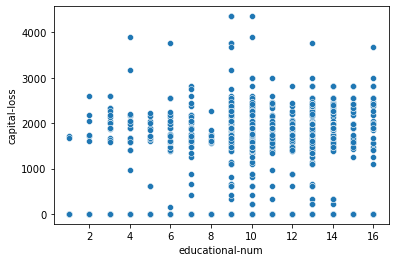

In [67]:
# Scatter Plot
sns.scatterplot(x = df['educational-num'], y = df['capital-loss'], data = df)

0.08097193774847287

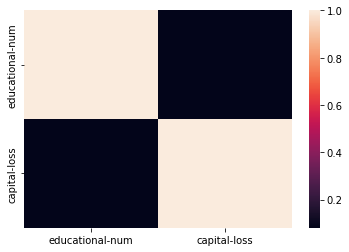

In [68]:
# Correlation
sns.heatmap(df[['educational-num', 'capital-loss']].corr())
df['educational-num'].corr(df['capital-loss'])

**Observations:**  There is no relation between educational-num and capital-loss column.

#### 12) Bivariate Analysis on educational-num and hours-per-week Column:

<AxesSubplot:xlabel='educational-num', ylabel='hours-per-week'>

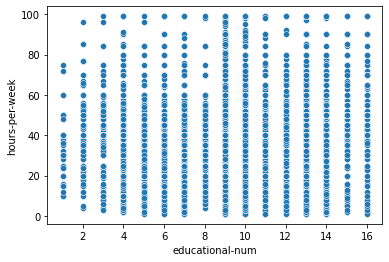

In [69]:
# Scatter Plot
sns.scatterplot(x = df['educational-num'], y = df['hours-per-week'], data = df)

0.1436889093924791

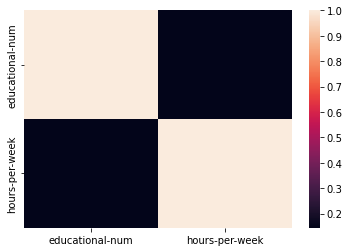

In [70]:
# Correlation
sns.heatmap(df[['educational-num', 'hours-per-week']].corr())
df['educational-num'].corr(df['hours-per-week'])

**Observations:**  There is no relation between educational-num and hours-per-week column.

#### 13) Bivariate Analysis on capital-gain and capital-loss Column:

<AxesSubplot:xlabel='capital-gain', ylabel='capital-loss'>

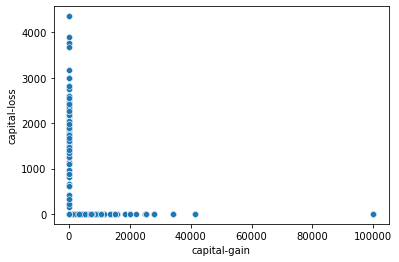

In [71]:
# Scatter Plot
sns.scatterplot(x = df['capital-gain'], y = df['capital-loss'], data = df)

-0.03144077064746342

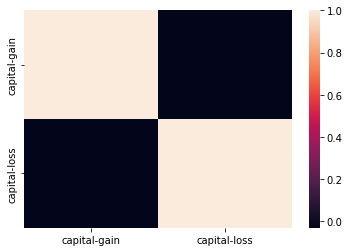

In [72]:
# Correlation
sns.heatmap(df[['capital-gain', 'capital-loss']].corr())
df['capital-gain'].corr(df['capital-loss'])

**Observations:**  There is no relation between capital-gain and capital-loss column.

#### 14) Bivariate Analysis on capital-gain and hours-per-week Column:

<AxesSubplot:xlabel='capital-gain', ylabel='hours-per-week'>

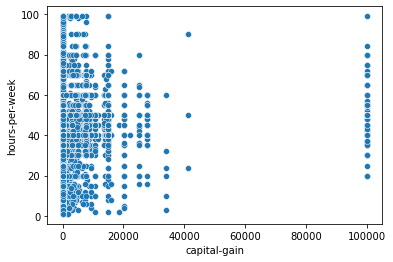

In [73]:
# Scatter Plot
sns.scatterplot(x = df['capital-gain'], y = df['hours-per-week'], data = df)

0.08215727805587876

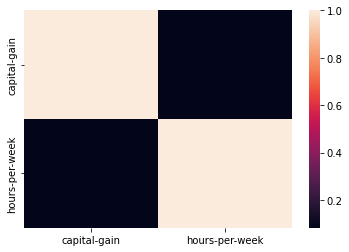

In [74]:
# Correlation
sns.heatmap(df[['capital-gain', 'hours-per-week']].corr())
df['capital-gain'].corr(df['hours-per-week'])

**Observations:**  There is no relation between capital-gain and hours-per-week column.

#### 15) Bivariate Analysis on capital-loss and hours-per-week Column:

<AxesSubplot:xlabel='capital-loss', ylabel='hours-per-week'>

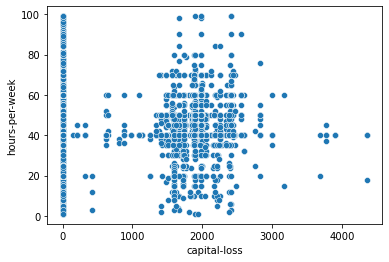

In [75]:
# Scatter Plot
sns.scatterplot(x = df['capital-loss'], y = df['hours-per-week'], data = df)

0.05446721609518735

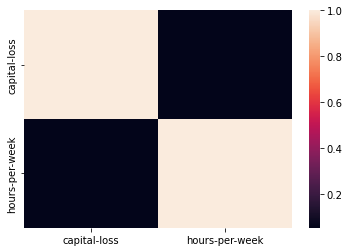

In [76]:
# Correlation
sns.heatmap(df[['capital-loss', 'hours-per-week']].corr())
df['capital-loss'].corr(df['hours-per-week'])

**Observations:**  There is no relation between capital-loss and hours-per-week column.

### Categorial and Numerical Bivariate Analysis:
#### 1) Bivariate Analysis on workclass and age Column:

<AxesSubplot:xlabel='workclass'>

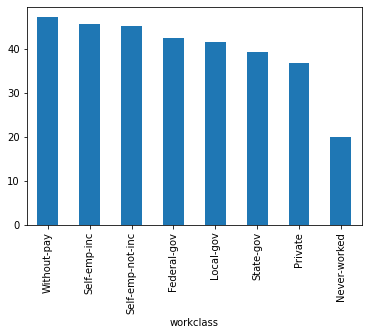

In [77]:
# BARPLOT
df.groupby('workclass')['age'].mean().sort_values(ascending = False).plot.bar()

**Observations:**  The mean age of Without-pay work class is highest.

#### 2) Bivariate Analysis on workclass and fnlwgt Column:

<AxesSubplot:xlabel='workclass'>

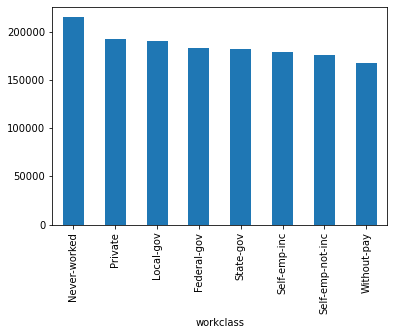

In [78]:
# BARPLOT
df.groupby('workclass')['fnlwgt'].mean().sort_values(ascending = False).plot.bar()

**Observations:**  The mean final weight of Never-worked work class is highest.

#### 3) Bivariate Analysis on workclass and educational-num Column:

<AxesSubplot:xlabel='workclass'>

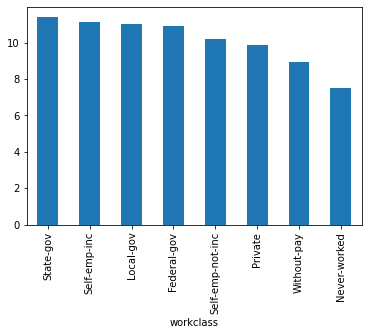

In [79]:
# BARPLOT
df.groupby('workclass')['educational-num'].mean().sort_values(ascending = False).plot.bar()

**Observations:**  The mean educational-num of State-gov work class is highest.

#### 4) Bivariate Analysis on workclass and capital-gain Column:

<AxesSubplot:xlabel='workclass'>

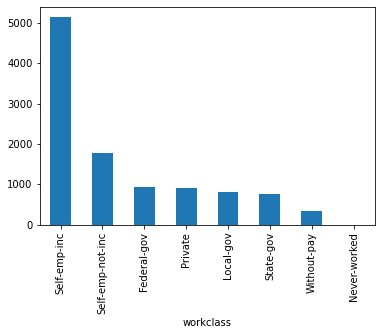

In [80]:
# BARPLOT
df.groupby('workclass')['capital-gain'].mean().sort_values(ascending = False).plot.bar()

**Observations:**  The mean capital-gain of Self-emp-inc work class is way higher than the rest class.

#### 5) Bivariate Analysis on workclass and capital-loss Column:

<AxesSubplot:xlabel='workclass'>

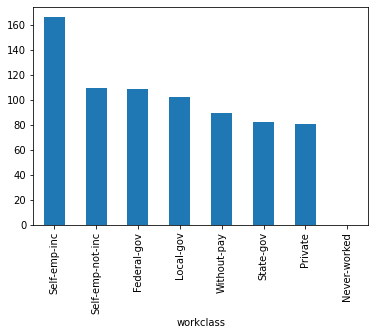

In [81]:
# BARPLOT
df.groupby('workclass')['capital-loss'].mean().sort_values(ascending = False).plot.bar()

**Observations:**  The mean capital-loss of Self-emp-inc work class is highest.

#### 6) Bivariate Analysis on workclass and hours-per-week Column:

<AxesSubplot:xlabel='workclass'>

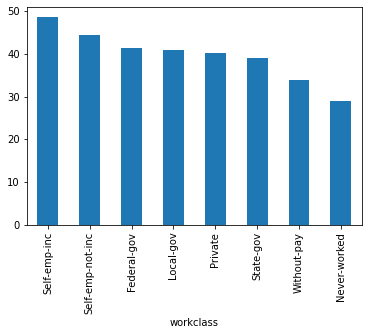

In [82]:
# BARPLOT
df.groupby('workclass')['hours-per-week'].mean().sort_values(ascending = False).plot.bar()

**Observations:**  The mean hours-per-week of Self-emp-inc work class is highest.

#### 7) Bivariate Analysis on education and fnlwgt Column:

<AxesSubplot:xlabel='education'>

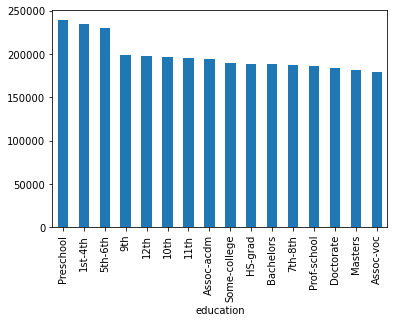

In [83]:
# BARPLOT
df.groupby('education')['fnlwgt'].mean().sort_values(ascending = False).plot.bar()

**Observations:**  The mean final weight is highest for Preschool education adults.

#### 8) Bivariate Analysis on education and capital-gain Column:

<AxesSubplot:xlabel='education'>

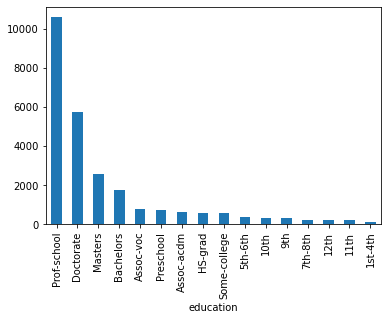

In [84]:
# BARPLOT
df.groupby('education')['capital-gain'].mean().sort_values(ascending = False).plot.bar()

**Observations:**  The mean capital-gain is highest for Preschool education adults.

#### 9) Bivariate Analysis on education and capital-loss Column:

<AxesSubplot:xlabel='education'>

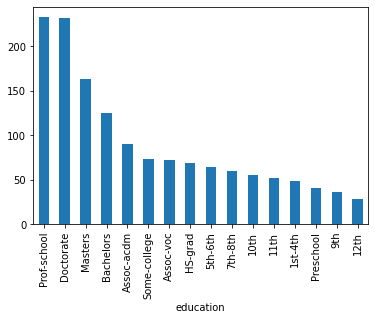

In [85]:
# BARPLOT
df.groupby('education')['capital-loss'].mean().sort_values(ascending = False).plot.bar()

**Observations:**  The mean capital-loss is highest for Preschool education adults.

#### 10) Bivariate Analysis on education and hours-per-week Column:

<AxesSubplot:xlabel='education'>

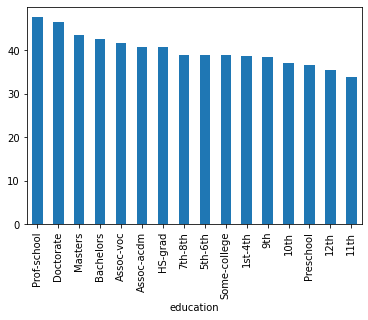

In [86]:
# BARPLOT
df.groupby('education')['hours-per-week'].mean().sort_values(ascending = False).plot.bar()

**Observations:**  The mean capital-loss is highest for Preschool education adults.

#### 11) Bivariate Analysis on marital-status and age Column:

<AxesSubplot:xlabel='marital-status'>

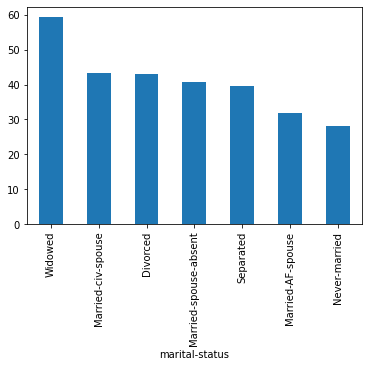

In [87]:
# BARPLOT
df.groupby('marital-status')['age'].mean().sort_values(ascending = False).plot.bar()

**Observations:**  The mean age is highest for the Widowed maritial status.

#### 12) Bivariate Analysis on marital-status and hours-per-week Column:

<AxesSubplot:xlabel='marital-status'>

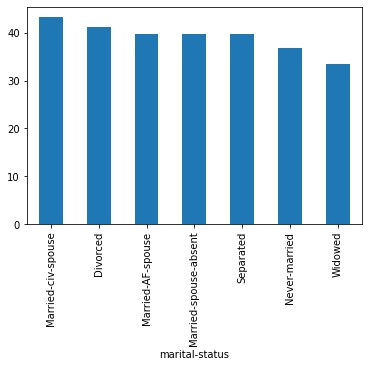

In [88]:
# BARPLOT
df.groupby('marital-status')['hours-per-week'].mean().sort_values(ascending = False).plot.bar()

**Observations:**  The mean hours-per-week is highest for the Married-civ-spouse maritial status.

#### 13) Bivariate Analysis on occupation and hours-per-week Column:

<AxesSubplot:xlabel='occupation'>

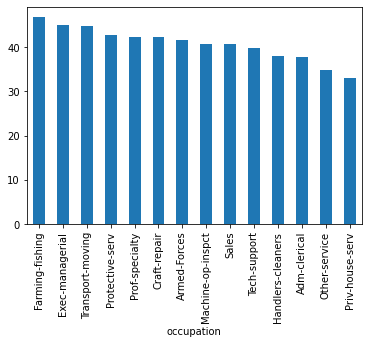

In [89]:
# BARPLOT
df.groupby('occupation')['hours-per-week'].mean().sort_values(ascending = False).plot.bar()

**Observations:**  The mean hours-per-week is highest for the Farming-Fishing occupation.

#### 14) Bivariate Analysis on relationship and hours-per-week Column:

<AxesSubplot:xlabel='relationship'>

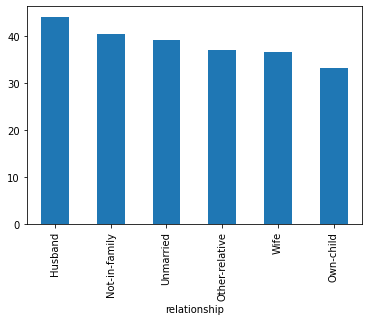

In [90]:
# BARPLOT
df.groupby('relationship')['hours-per-week'].mean().sort_values(ascending = False).plot.bar()

**Observations:**  The mean hours-per-week is highest for the adult with Husband and lowest who owns a Child.

#### 15) Bivariate Analysis on gender and hours-per-week Column:

<AxesSubplot:xlabel='gender'>

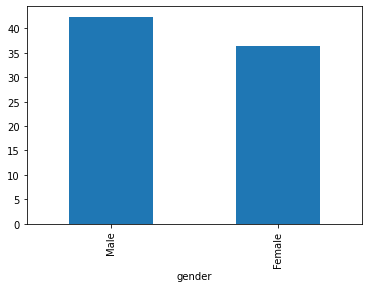

In [91]:
# BARPLOT
df.groupby('gender')['hours-per-week'].mean().sort_values(ascending = False).plot.bar()

**Observations:**  The mean hours-per-week is higher for the Male Gender compared to the Female Gender.

<h3> Step 5: </h3> <h4> In the above steps you might have encountered many missing values and outliers:</h4>
●	Find and treat the outliers and missing values in each column 😥 <br>
●	Read this Kaggle Notebook and understand various ways to detect and handle outliers. Try to implement the same. Outlier!!! The Silent Killer.

In [92]:
# Finding null values in columns
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

**We Observe that there are missing values in 3 columns: Workclass, Occupation and Native-Country. <br> As all the 3 columns are categorical lets find the mode of the columns and replace it with NaN values.**

In [93]:
# Replacing NaN values with mode
df['workclass'].fillna(df['workclass'].mode()[0],inplace = True)
df['occupation'].fillna(df['occupation'].mode()[0],inplace = True)
df['native-country'].fillna(df['native-country'].mode()[0],inplace = True)

In [94]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**There are no more missing values in out dataset.**

In [95]:
# Dropping columns fnlwgt , capital-gain , and capital-loss as they are insignificant for us to derive any conclusions.

df.drop(columns=['fnlwgt','capital-gain','capital-loss'],axis=1,inplace=True)
df.head(3)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K


#### 1)  Handling Outlier of age column:

In [96]:
df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [97]:
q1 = df['age'].quantile(0.25) 
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
low_thresh = q1 - (1.5*iqr)
high_thresh = q3 + (1.5*iqr)
print(low_thresh)
print(high_thresh)

-2.0
78.0


In [98]:
df.loc[df['age']>75, 'age'] = np.mean(df['age'])

<AxesSubplot:>

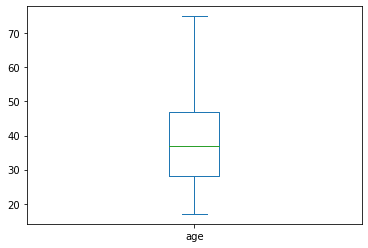

In [99]:
df['age'].plot.box()

#### Outliers from age column has been removed.

#### 2) Handling Outlier of educational-num column:

In [100]:
df['educational-num'].describe()

count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: educational-num, dtype: float64

In [101]:
q1 = df['educational-num'].quantile(0.25) 
q3 = df['educational-num'].quantile(0.75)
iqr = q3 - q1
low_thresh = q1 - (1.5*iqr)
high_thresh = q3 + (1.5*iqr)
print(low_thresh)
print(high_thresh)

4.5
16.5


In [102]:
df.loc[df['educational-num']>16.5, 'educational-num'] = np.median(df['educational-num'])
df.loc[df['educational-num']<4.5, 'educational-num'] = np.median(df['educational-num'])

<AxesSubplot:>

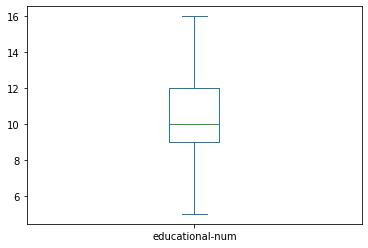

In [103]:
df['educational-num'].plot.box()

#### Outliers from age column has been removed.

#### 3) Handling Outlier of hours-per-week column:

In [104]:
df['hours-per-week'].describe()

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [105]:
q1 = df['hours-per-week'].quantile(0.25) 
q3 = df['hours-per-week'].quantile(0.75)
iqr = q3 - q1
low_thresh = q1 - (1.5*iqr)
high_thresh = q3 + (1.5*iqr)
print(low_thresh)
print(high_thresh)

32.5
52.5


In [106]:
df.loc[df['hours-per-week']>52, 'hours-per-week'] = np.mean(df['hours-per-week'])
df.loc[df['hours-per-week']<32, 'hours-per-week'] = np.mean(df['hours-per-week'])

<AxesSubplot:>

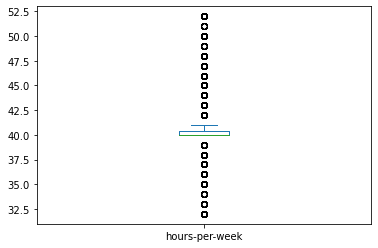

In [107]:
df['hours-per-week'].plot.box()

In [108]:
df['hours-per-week'].describe()

count    48842.000000
mean        40.779840
std          3.754505
min         32.000000
25%         40.000000
50%         40.000000
75%         40.422382
max         52.000000
Name: hours-per-week, dtype: float64

<h3> Step 7: </h3> <h4> Split the data into train and test. After which you need to perform feature transformation:</h4>
●	For Numerical Features -> Do Column Standardization<br>
●	For Categorical -> if more than 2 categories, use dummy variables. Otherwise convert the feature to Binary.<br>
●	You are free to explore other feature transformations.

In [109]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [110]:
df['income'] = df['income'].map({'<=50K' : 1, '>50K' : 0})

In [111]:
df['income'].value_counts()

1    37155
0    11687
Name: income, dtype: int64

#### Denoting 1 for Minority Class and 0 for Majority Class.

In [112]:
df = pd.get_dummies(df, columns = ['gender','workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country'])

In [113]:
df.shape

(48842, 103)

In [114]:
df.head(3)

,age,educational-num,hours-per-week,income,gender_Female,gender_Male,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25.0,7,40.0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38.0,9,50.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28.0,12,40.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [115]:
# Splitting the columns
X = df.drop(['income'],axis=1)
y = df['income'].values

In [116]:
X[0:5]

,age,educational-num,hours-per-week,gender_Female,gender_Male,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25.0,7,40.000000,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38.0,9,50.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28.0,12,40.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,44.0,10,40.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,18.0,10,37.964306,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [117]:
y[0:5]

array([1, 1, 0, 0, 1], dtype=int64)

#### Splitting Data:

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (39073, 102) (39073,)
Test Set:  (9769, 102) (9769,)


#### Standardization:

In [119]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [120]:
X[0:1]

array([[-1.00948750e+00, -1.51174382e+00, -2.07709923e-01,
        -7.04220486e-01,  7.04220486e-01, -1.73794701e-01,
        -2.61939756e-01, -1.43102672e-02,  5.75033388e-01,
        -1.89608507e-01, -2.93019423e-01, -2.05606321e-01,
        -2.07398835e-02, -1.71087896e-01,  5.09458007e+00,
        -1.16768783e-01, -7.12939510e-02, -1.02621183e-01,
        -1.41218915e-01, -1.25386729e-01, -1.84092512e-01,
        -2.09896040e-01, -4.43406423e-01, -1.10956708e-01,
        -6.90987591e-01, -2.39853082e-01, -4.12583306e-02,
        -1.31803280e-01, -5.35289279e-01, -3.96417179e-01,
        -2.75339617e-02, -9.19603890e-01, -1.14128272e-01,
         1.42494376e+00, -1.79829138e-01, -1.79099826e-01,
        -3.60265350e-01, -1.75273238e-02, -3.78203224e-01,
        -3.77283176e-01, -1.77387891e-01, -2.10480172e-01,
         3.89385982e+00, -3.34802503e-01, -7.05650329e-02,
        -4.74666141e-01, -1.43316089e-01, -3.56372989e-01,
        -1.74667981e-01, -2.25076263e-01, -8.22752067e-0

<h3> Step 8: </h3> <h4> Build various Machine Learning models considering ‘income’ as target variable. Also make sure to perform Hyperparameter tuning to avoid Overfitting of models.</h4>

In [121]:
# importing modules to test the accuracy
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

#### Building Models:

#### Decision Tree

In [126]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

# Prediction on Test Dataset

y_pred_lr = lr.predict(X_test)

y_pred_lr

# Model Evaluation

from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_lr)

0.8321220186303614

In [127]:
logistic_regression_acc = metrics.accuracy_score(y_test,y_pred_lr)*100
logistic_regression_acc

83.21220186303614

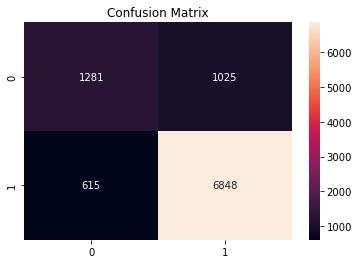

In [128]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [129]:
#Logistic Regression Model Tuning (Using Regularization)

lr_score = {}

for this_C in [0.1, 1, 100]:
    
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    
    score = clf.score(X_test,y_test)
    
    lr_score[this_C] = score
lr_score

{0.1: 0.8334527587265841, 1: 0.8321220186303614, 100: 0.8327362063670796}

In [130]:
# ROC AUC Score

prob = lr.predict_proba(X_test)

prob = prob[:, 1]

roc_auc_lr = metrics.roc_auc_score(y_test, prob)

print('Logistic Regression ROC_AUC Score : {}'.format(roc_auc_lr))

Logistic Regression ROC_AUC Score : 0.8792880378122123


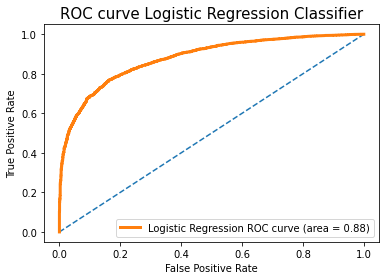

In [131]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model
plt.plot(fpr, tpr, lw=3, label='Logistic Regression ROC curve (area = {:0.2f})'.format(roc_auc_lr))

plt.title('ROC curve Logistic Regression Classifier', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [132]:
# K- Nearest Neighbour Classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(X_train,y_train)

# Prediction

y_pred_knn = knn.predict(X_test)

y_pred_knn

# Model Evaluation 

print('Accuracy of KNN on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN on training set: 0.86
Accuracy of KNN on test set: 0.82


In [133]:
KNN_acc = metrics.accuracy_score(y_test,y_pred_knn)*100
KNN_acc

81.92240761592794

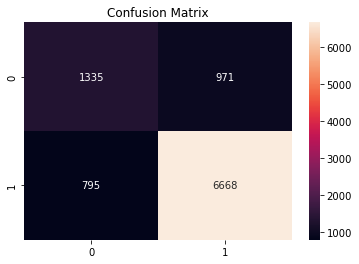

In [134]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [135]:
# ROC AUC Score

prob_knn = knn.predict_proba(X_test)

prob_knn = prob_knn[:, 1]

roc_auc_knn = metrics.roc_auc_score(y_test, prob_knn)

print('KNN ROC_AUC Score : {}'.format(roc_auc_knn))

KNN ROC_AUC Score : 0.8494670266346646


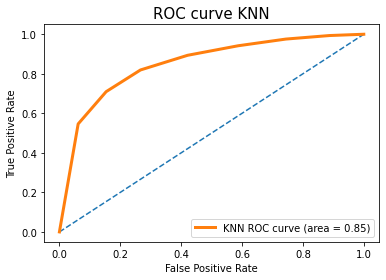

In [136]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_knn)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, lw=3, label='KNN ROC curve (area = {:0.2f})'.format(roc_auc_knn))

plt.title('ROC curve KNN', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [137]:
# Gaussian Navie Bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

# Prediction on test dataset

y_pred_gnb = nb.predict(X_test)
y_pred_gnb

print('Accuracy of Gaussian NB classifier on training set: {:.2f}'
     .format(nb.score(X_train, y_train)))
print('Accuracy of Gaussian NB classifier on test set: {:.2f}'
     .format(nb.score(X_test, y_test)))

Accuracy of Gaussian NB classifier on training set: 0.61
Accuracy of Gaussian NB classifier on test set: 0.61


In [138]:
Naive_Bayes_acc = metrics.accuracy_score(y_test,y_pred_gnb)*100
Naive_Bayes_acc

61.234517350803564

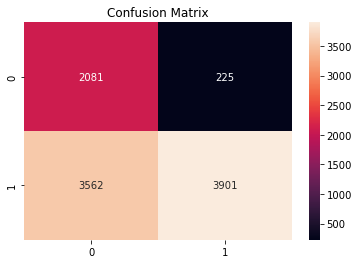

In [139]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [140]:
# ROC AUC Score

prob_nb = nb.predict_proba(X_test)

prob_nb = prob_nb[:, 1]

roc_auc_gnb = metrics.roc_auc_score(y_test, prob_nb)

print('Gaussian NB ROC_AUC Score : {}'.format(roc_auc_gnb))

Gaussian NB ROC_AUC Score : 0.8360152642019218


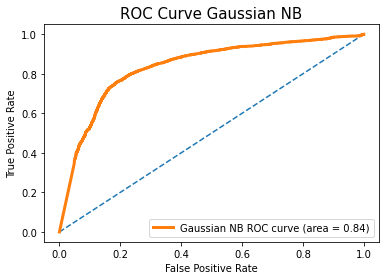

In [141]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_nb)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, lw=3, label='Gaussian NB ROC curve (area = {:0.2f})'.format(roc_auc_gnb))

plt.title('ROC Curve Gaussian NB', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [142]:
# Decision tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

# Prediction

y_pred_dt = dt.predict(X_test)
y_pred_dt

# Evaluation of the model 

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.96
Accuracy of Decision Tree classifier on test set: 0.78


In [143]:
DT_acc = metrics.accuracy_score(y_test,y_pred_dt)*100
DT_acc

78.13491657283242

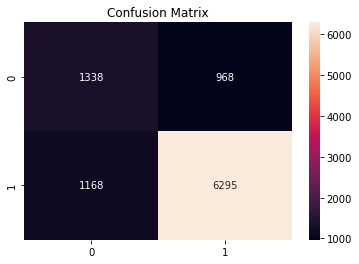

In [144]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [145]:
# ROC AUC Score

prob_dt = dt.predict_proba(X_test)

prob_dt = prob_dt[:, 1]

roc_auc_dt = metrics.roc_auc_score(y_test, prob_dt)

print('Decision Trees ROC_AUC Score : {}'.format(roc_auc_dt))

Decision Trees ROC_AUC Score : 0.7295917448310189


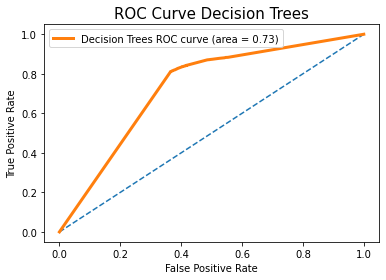

In [146]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_dt)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, lw=3, label='Decision Trees ROC curve (area = {:0.2f})'.format(roc_auc_dt))

plt.title('ROC Curve Decision Trees', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [147]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier(random_state = 0)

# Fitting the data

gbt.fit(X_train, y_train)

y_pred_gbt= gbt.predict(X_test)
y_pred_gbt

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [148]:
# Model Evaluation

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(gbt.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(gbt.score(X_test, y_test)))

Accuracy of GBDT classifier on training set: 0.84
Accuracy of GBDT classifier on test set: 0.84



In [149]:
GBDT_acc = metrics.accuracy_score(y_test,y_pred_gbt)*100
GBDT_acc

83.97993653393388

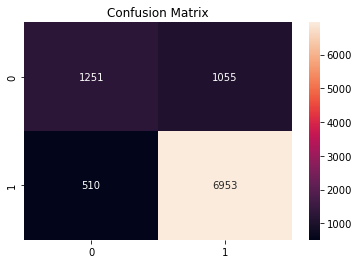

In [150]:
# Confusion Matrix

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_gbt), annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.show()

In [151]:
# ROC AUC Score

prob_gbdt = gbt.predict_proba(X_test)

prob_gbdt = prob_gbdt[:, 1]

roc_auc_gbdt = metrics.roc_auc_score(y_test, prob_gbdt)

print('Gradient Boosting ROC_AUC Score : {}'.format(roc_auc_gbdt))

Gradient Boosting ROC_AUC Score : 0.8933235125026743


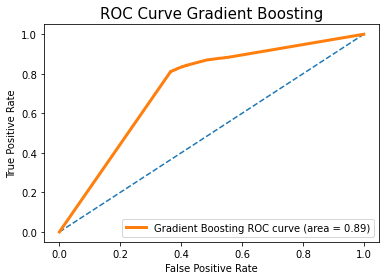

In [152]:
# Plotting Roc Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_dt)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model

plt.plot(fpr, tpr, lw=3, label='Gradient Boosting ROC curve (area = {:0.2f})'.format(roc_auc_gbdt))

plt.title('ROC Curve Gradient Boosting', fontsize=15)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [153]:
x = {'Logistic Regression' : logistic_regression_acc,'K Nearest Neighbour': KNN_acc,'Naive Bayes':Naive_Bayes_acc,'decision tree' : DT_acc,'Gradient Boosting ROC_AUC Score':GBDT_acc}

In [154]:
x

{'Logistic Regression': 83.21220186303614,
 'K Nearest Neighbour': 81.92240761592794,
 'Naive Bayes': 61.234517350803564,
 'decision tree': 78.13491657283242,
 'Gradient Boosting ROC_AUC Score': 83.97993653393388}

In [155]:
accuracy = pd.DataFrame.from_dict(x, orient='index',columns=['accuracy'])
accuracy

,accuracy
Logistic Regression,83.212202
K Nearest Neighbour,81.922408
Naive Bayes,61.234517
decision tree,78.134917
Gradient Boosting ROC_AUC Score,83.979937


GRADIENT BOOSTING Classifier beats the rest with the best performance when we calculate accuracy

Comparison of ROC_AUC Score of different models

In [156]:
clfs = {
    'Logistic Regression':roc_auc_lr,
    'KNN':roc_auc_knn,
    'GaussianNB':roc_auc_gnb,
    'DecisionTrees':roc_auc_dt,
    'GBDT':roc_auc_gbdt
}

In [157]:
models_comp_score = pd.DataFrame.from_dict(data = clfs, orient='index',columns=['ROC_AUC Score'])
models_comp_score.sort_values(by='ROC_AUC Score', ascending=False)

,ROC_AUC Score
GBDT,0.893324
Logistic Regression,0.879288
KNN,0.849467
GaussianNB,0.836015
DecisionTrees,0.729592


In [158]:
models_comp_score.index

Index(['Logistic Regression', 'KNN', 'GaussianNB', 'DecisionTrees', 'GBDT'], dtype='object')

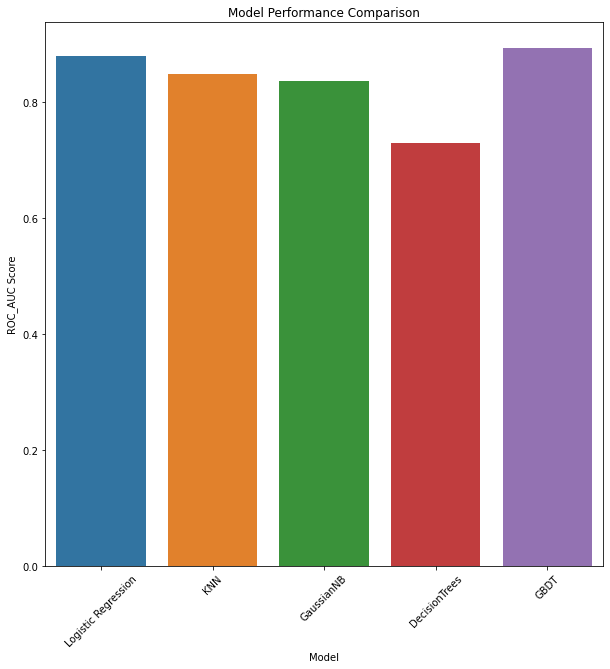

In [159]:
# Plotting Models Performance Bar Plot

plt.figure(figsize=(10,10))

sns.barplot(x=models_comp_score.index , y = models_comp_score['ROC_AUC Score'])

plt.title('Model Performance Comparison')

plt.xlabel('Model')

plt.xticks(rotation=45)

plt.show()

GRADIENT BOOSTING Classifier beats the rest with the best performance when we calculate ROC_AUC_Score

# Hence, Completed.